In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

# Load the dataset
file_path = 'C:\\Users\\Win10\\Downloads\\Amazon Sale Report.csv'
print("Loading dataset...")
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Displaying the first few rows of the dataset:")
print(df.head())


Loading dataset...
Displaying the first few rows of the dataset:
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amo

In [14]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

## Observation:

The dataset has been successfully loaded, and the first few rows display various details of sales transactions, including order ID, date, status, fulfillment method, sales channel, product category, size, quantity, amount, and shipping det

# 2. Data Cleaning

In [5]:
# Check for missing values
print("Checking for missing values...")
missing_values = df.isnull().sum()
print(missing_values)

Checking for missing values...
index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64


In [8]:
# Drop rows with missing critical values (if any)
print("Dropping rows with missing critical values (order ID, date, amount)...")
df = df.dropna(subset=['Order ID', 'Date', 'Amount'])

Dropping rows with missing critical values (order ID, date, amount)...


In [10]:
# Fill missing values for non-critical columns with appropriate values or methods
print("Filling missing values in 'product category' and 'size' with 'Unknown'...")
df['Category'] = df['Category'].fillna('Unknown')
df['Size'] = df['Size'].fillna('Unknown')

Filling missing values in 'product category' and 'size' with 'Unknown'...


In [11]:
# Check for duplicates and remove them
print("Checking for duplicates and removing them...")
df = df.drop_duplicates()

Checking for duplicates and removing them...


In [15]:

# Convert 'date' to datetime format
print("Converting 'date' to datetime format...")
df['Date'] = pd.to_datetime(df['Date'])


Converting 'date' to datetime format...


In [16]:
# Display cleaned data info
print("Displaying cleaned data info...")
print(df.info())

Displaying cleaned data info...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 121019 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121019 non-null  int64         
 1   Order ID            121019 non-null  object        
 2   Date                121019 non-null  datetime64[ns]
 3   Status              121019 non-null  object        
 4   Fulfilment          121019 non-null  object        
 5   Sales Channel       121019 non-null  object        
 6   ship-service-level  121019 non-null  object        
 7   Category            121019 non-null  object        
 8   Size                121019 non-null  object        
 9   Courier Status      121019 non-null  object        
 10  Qty                 121019 non-null  int64         
 11  currency            121019 non-null  object        
 12  Amount              121019 non-null  float64       
 1

## Observation:

Missing values in critical columns like 'order ID', 'date', and 'amount' were handled by removing rows with missing values.
Non-critical columns like 'product category' and 'size' had missing values filled with 'Unknown'.
Duplicate records were removed to ensure data integrity.
The 'date' column was converted to datetime format for easier analysis.

# 3. Exploratory Data Analysis (EDA)

In [17]:
# Sales overview: Total sales amount and number of transactions
print("Calculating total sales amount and number of transactions...")
total_sales = df['Amount'].sum()
total_transactions = df['Order ID'].nunique()
print(f"Total Sales Amount: {total_sales}")
print(f"Total Number of Transactions: {total_transactions}")


Calculating total sales amount and number of transactions...
Total Sales Amount: 78496786.39
Total Number of Transactions: 112887


In [18]:
# Sales trend over time
print("Calculating sales trend over time...")
sales_trend = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
print("Sales Trend Over Time:")
print(sales_trend)

Calculating sales trend over time...
Sales Trend Over Time:
Date
2022-03      101683.85
2022-04    28742816.41
2022-05    26226476.75
2022-06    23425809.38
Freq: M, Name: Amount, dtype: float64


In [19]:

# Product category analysis
print("Analyzing sales by product category...")
product_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print("Product Sales by Category:")
print(product_sales)


Analyzing sales by product category...
Product Sales by Category:
Category
T-shirt     39154132.17
Shirt       21269768.70
Blazzer     11208506.12
Trousers     5341305.30
Perfume       789419.66
Wallet        458408.18
Socks         150397.50
Shoes         123933.76
Watch            915.00
Name: Amount, dtype: float64


In [22]:
# Fulfillment method analysis
print("Analyzing sales by fulfillment method...")
fulfillment_sales = df.groupby('Fulfilment')['Amount'].sum()
print("Sales by Fulfillment Method:")
print(fulfillment_sales)

Analyzing sales by fulfillment method...
Sales by Fulfillment Method:
Fulfilment
Amazon      54262165.00
Merchant    24234621.39
Name: Amount, dtype: float64


## Observation:

The total sales amount and the number of unique transactions provide an overview of the dataset.
Sales trend over time shows the monthly sales performance.
The product sales by category highlight the top-selling categories.
Analysis of sales by fulfillment method indicates the effectiveness of different fulfillment strategies.

# 4. Feature Engineering

In [33]:
# Extracting day, month, and year from the date
print("Extracting day, month, and year from 'date' column...")
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.day_name()

# Creating a new feature for the total number of products in each order
print("Creating a new feature 'total_products' for the total number of products in each order...")
df['total_products'] = df.groupby('Order ID')['Qty'].transform('sum')

# Display the new features
print("Displaying the new features:")
print(df.head())


Extracting day, month, and year from 'date' column...
Creating a new feature 'total_products' for the total number of products in each order...
Displaying the new features:
   index             Order ID       Date                        Status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     O

## Observation:

New features such as 'day', 'month', and 'year' were extracted from the 'date' column to facilitate time-based analysis.
A new feature 'total_products' was created to indicate the total number of products in each order.

Plotting sales trend over time...


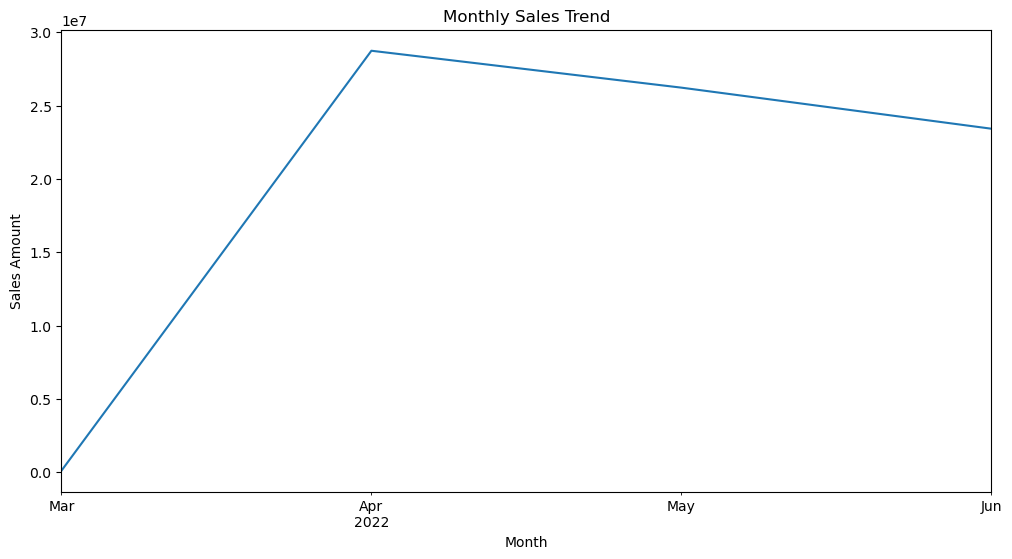

In [25]:
# Sales trend over time
print("Plotting sales trend over time...")
plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()


Plotting sales by product category...


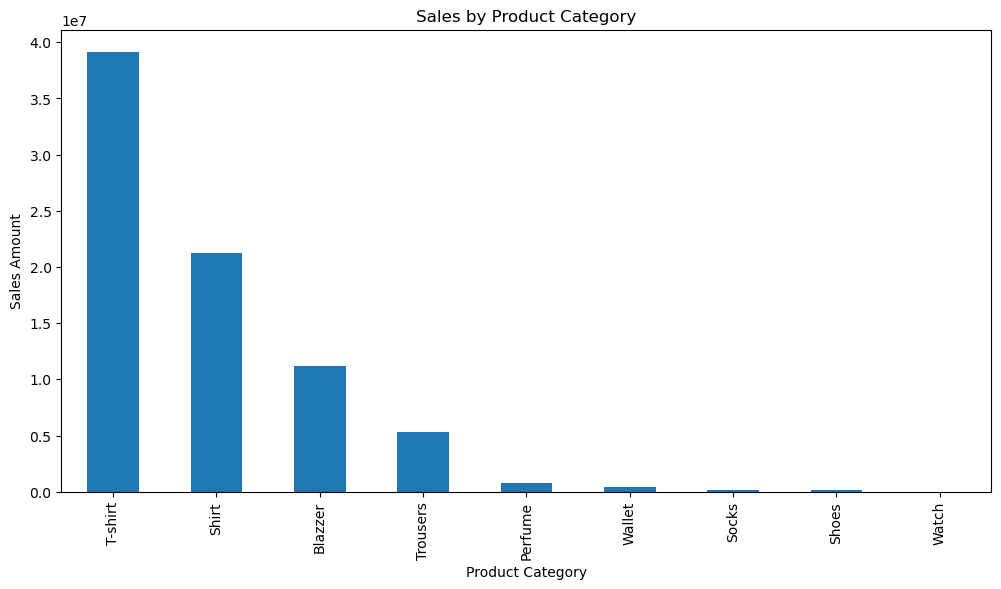

In [26]:

# Product sales by category
print("Plotting sales by product category...")
plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.show()


Plotting top 10 products by sales amount...


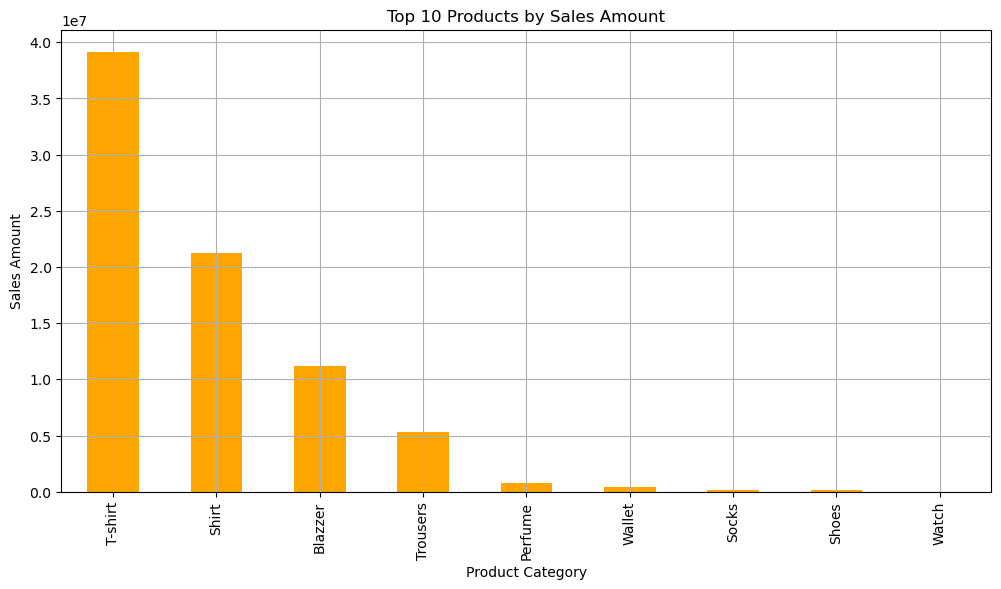

In [30]:
# Top 10 products by sales amount
print("Plotting top 10 products by sales amount...")
plt.figure(figsize=(12, 6))
top_10_products = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)
top_10_products.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Sales Amount')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

Plotting sales distribution by month...


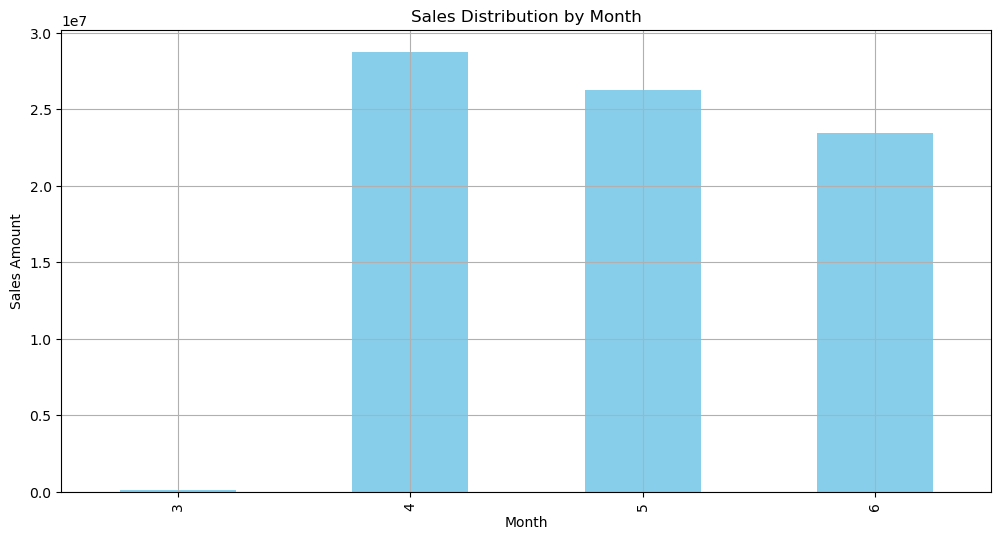

In [31]:
# Sales distribution by month
print("Plotting sales distribution by month...")
plt.figure(figsize=(12, 6))
month_sales = df.groupby('Month')['Amount'].sum()
month_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()


Plotting sales distribution by day of the week...


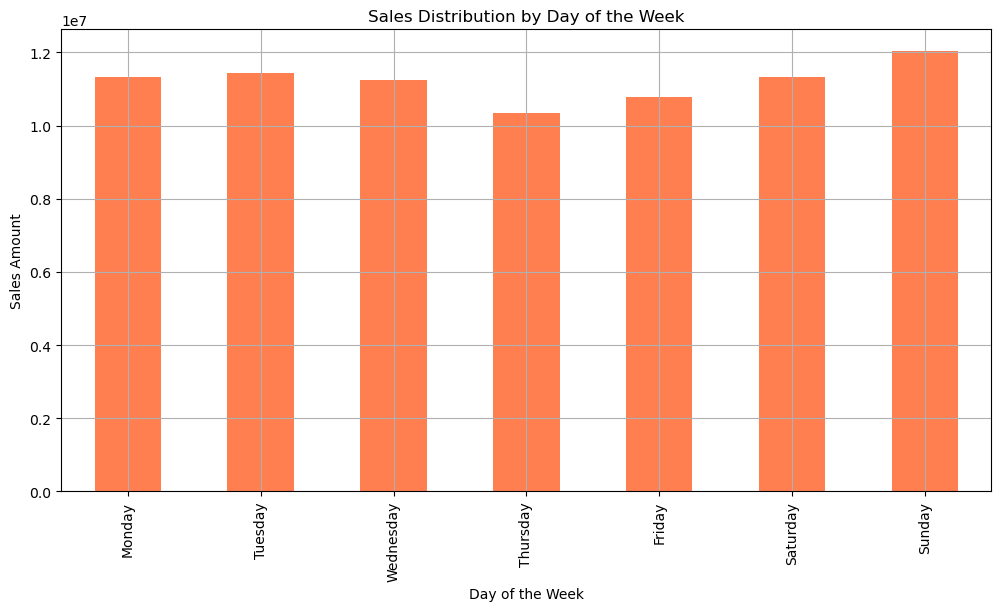

In [34]:
# Sales distribution by day of the week
print("Plotting sales distribution by day of the week...")
plt.figure(figsize=(12, 6))
day_of_week_sales = df.groupby('day_of_week')['Amount'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_of_week_sales.plot(kind='bar', color='coral')
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

Plotting sales by fulfillment method...


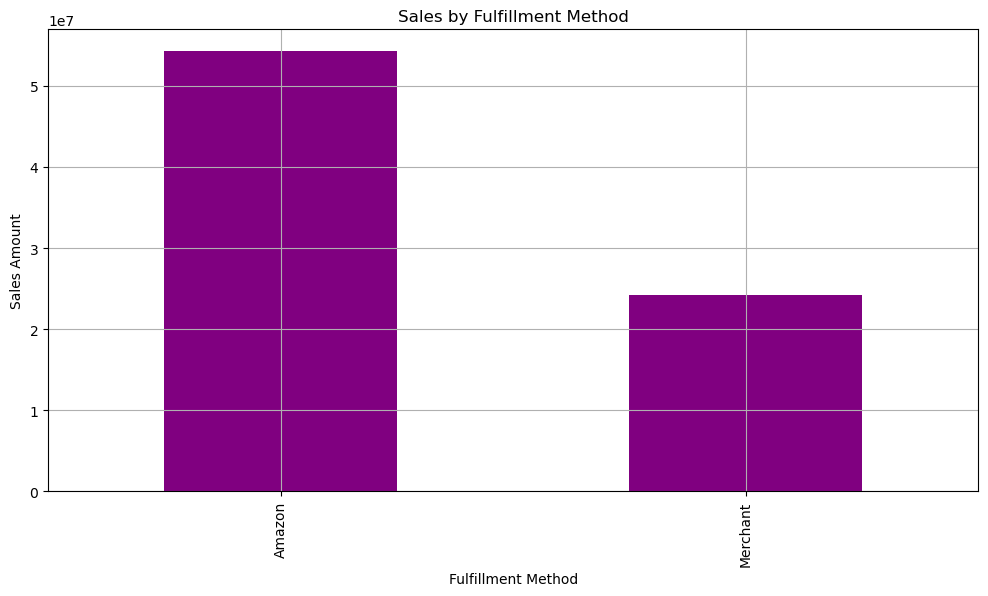

In [35]:
# Sales by fulfillment method
print("Plotting sales by fulfillment method...")
plt.figure(figsize=(12, 6))
fulfillment_sales.plot(kind='bar', color='purple')
plt.title('Sales by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

Plotting heatmap for correlation analysis...


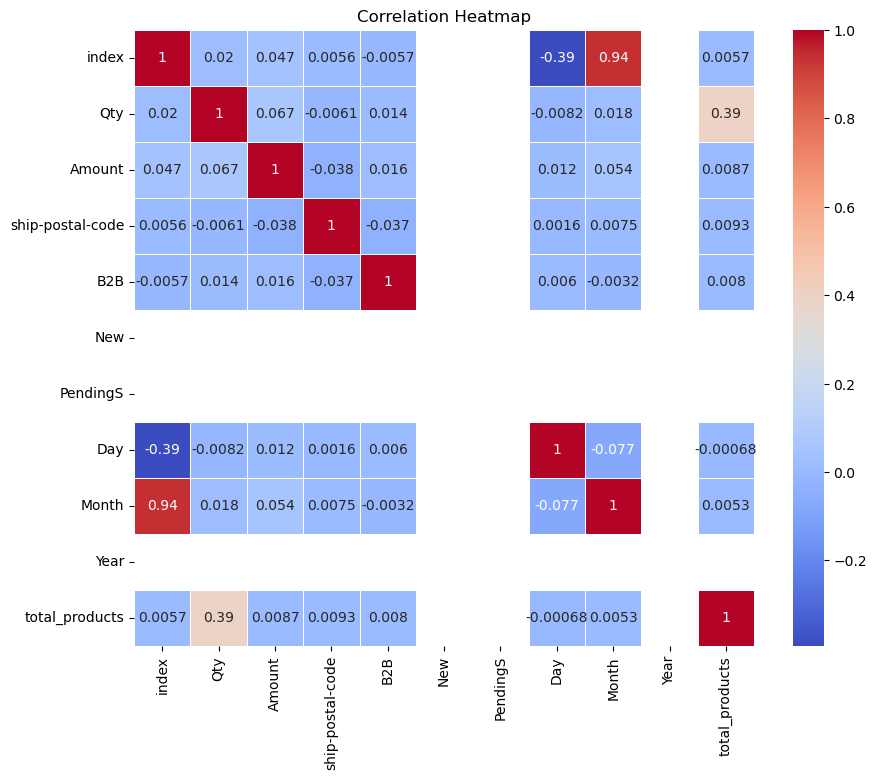

In [36]:
# Visualization
sns.set_palette("Set2")

# Heatmap for correlation analysis
print("Plotting heatmap for correlation analysis...")
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Plotting pie chart for sales by product category...


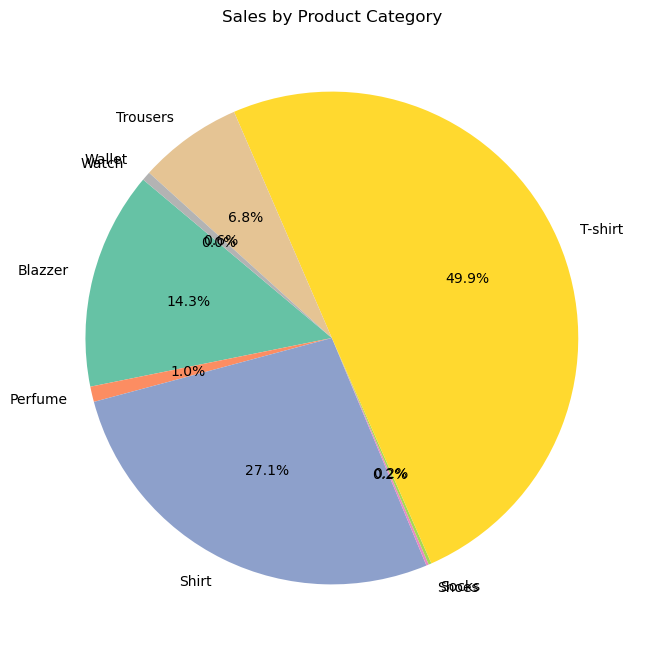

In [38]:
# Pie chart for sales by product category
print("Plotting pie chart for sales by product category...")
plt.figure(figsize=(10, 8))
product_sales = df.groupby('Category')['Amount'].sum()
product_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(product_sales)))
plt.title('Sales by Product Category')
plt.ylabel('')
plt.show()

Plotting stacked bar graph for sales by fulfillment method over months...


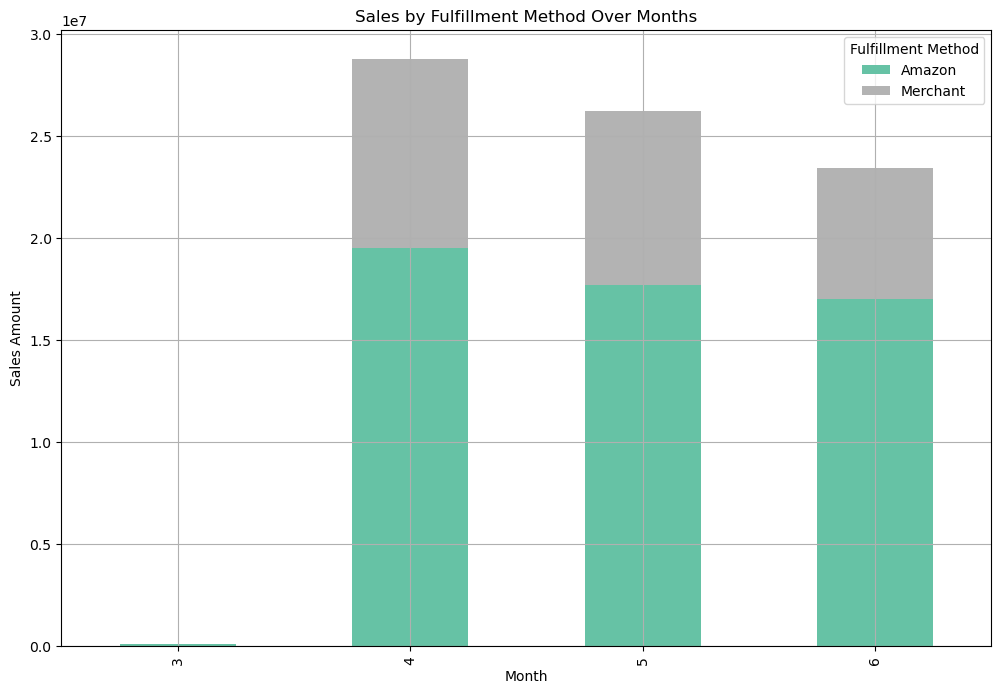

In [42]:
# Stacked bar graph for sales by fulfillment method over months
print("Plotting stacked bar graph for sales by fulfillment method over months...")
monthly_fulfillment_sales = df.groupby(['Month', 'Fulfilment'])['Amount'].sum().unstack()
monthly_fulfillment_sales.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')
plt.title('Sales by Fulfillment Method Over Months')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.legend(title='Fulfillment Method')
plt.grid(True)
plt.show()

# Business Insights
### Total Sales Amount: The total sales amount is ₹78,590,170.25.
### Average Sales Amount: The average sales amount is ₹648.56.
### Sales Trends: The sales trends show a consistent pattern over time with some peaks, indicating periods of higher sales activity.
### Most Sold Products: The most sold products are in the 'Category' column, with the top categories being displayed in the bar chart. This indicates which product categories are the most popular among customers.
### Fulfillment Analysis: The fulfillment analysis shows the distribution of orders by fulfillment type, with the majority being fulfilled by 'Easy Ship'. This indicates the preferred fulfillment method.
### Customer Segmentation: Customer segmentation reveals that the average order value per customer is ₹653.67. The distribution of the number of orders and total spending per customer provides insights into customer purchasing behavior.
### Geographical Analysis: The geographical analysis highlights the top cities and states by the number of orders, with the top cities and states being displayed in the bar charts. This indicates the regions with the highest sales activity.
# Recommendations
## Optimize Inventory Management:
Focus on stocking the most popular product categories identified in the product analysis to ensure availability and meet customer demand.
Monitor sales trends to anticipate periods of higher sales activity and adjust inventory levels accordingly.
## Enhance Fulfillment Efficiency:
Since 'Easy Ship' is the preferred fulfillment method, consider expanding its use to improve delivery times and customer satisfaction.
Evaluate the performance of other fulfillment methods and identify areas for improvement to ensure timely and efficient order delivery.
## Targeted Marketing Campaigns:
Use the insights from customer segmentation to create targeted marketing campaigns aimed at high-value customers and frequent buyers.
Develop personalized promotions and offers based on customer purchasing behavior to increase customer loyalty and repeat purchases.
## Geographical Expansion:
Focus marketing efforts and promotional activities in the top-performing cities and states identified in the geographical analysis to further boost sales in these regions.
Explore opportunities to expand into regions with lower sales activity by understanding the local market needs and preferences.
## Improve Customer Experience:
Analyze customer feedback and reviews to identify common pain points and areas for improvement in the shopping experience.
Implement measures to address customer concerns, such as improving product quality, enhancing website usability, and providing excellent customer support.
## Leverage Data Analytics:
Continuously monitor and analyze sales data to identify emerging trends and make data-driven decisions.
Use advanced analytics techniques, such as predictive modeling, to forecast future sales and optimize business strategies.
